# **Credit Card Customer Clustering**

**About Dataset**

**Project Description:** The sample dataset encapsulates the usage behavior of approximately 9000 active credit card holders over the past 6 months. Organized at the customer level, the dataset comprises 18 behavioral variables. The primary goal is to create customer segments that will contribute insights to the development of an effective marketing strategy.

**Project Objective:** Employ Cluster Analysis using KMeans for Credit Card Customer Segmentation.



Following is the Data Dictionary for Credit Card dataset :-

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Number of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [24]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **Step 1: Importing and reading the csv file**

In [25]:
#Load and examine the dataset
CC_df = pd.read_csv('CC GENERAL.csv')

In [27]:
CC_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Observation:** There are total of 18 columns, 17 of them are numerical features. There are also missing values at CREDIT_LIMIT and MINIMUM_PAYMENTS

# **Step 2: Dealing with null values and outliers**

In [29]:
CC_df.duplicated().sum()

0

In [30]:
#drop missing values
#from output 8950 --> 8636
CC_df = CC_df.dropna()

#check again to see if all missing values are dropped
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [31]:
CC_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# **Step 3: Perform pre-processing steps**

In [32]:
#drop CUST_ID since it has unique values
CC_df_clean = CC_df.drop('CUST_ID', axis = 1)
CC_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [37]:
#Get all column names
df_columns = CC_df_clean.columns
print(list(df_columns))

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [39]:
#Perform scaling to produce high quality clusters (standardizes the feature by removing the mean and scaling to unit variance)
#Use Standard Scaler

scaler = StandardScaler()
df_scaler = CC_df_clean
df_numpy = scaler.fit_transform(df_scaler)
CC_preprocessed = pd.DataFrame(df_numpy, columns=df_columns)
CC_preprocessed


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


# **Step 5: Perform PCA**

In [40]:
CC_preprocessed.shape

(8636, 17)

In [42]:
#Perform PCA to determine the desired number of components
#PCA reduces high-dimension data to smaller dimensions while preserving as much information as possible

pca = PCA()
pca.fit(CC_preprocessed)

PCA()

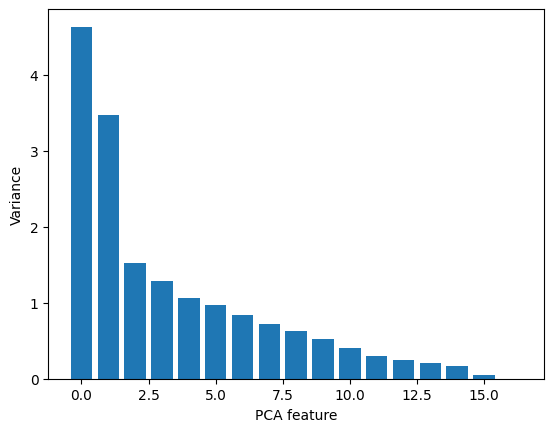

In [43]:
#Plot the explained variances to identify number of components/intrinsic dimension
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.show()

**Observation:** based on the PCA feature chart, we will use n_components = 2

In [44]:
n_components = 2

pca_2 = PCA(n_components=n_components)
pca_2.fit(CC_preprocessed)
pca_scaled_df = pca_2.transform(CC_preprocessed)

In [45]:
pca_scaled_df.shape

(8636, 2)

# **Step 6: KMeans Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

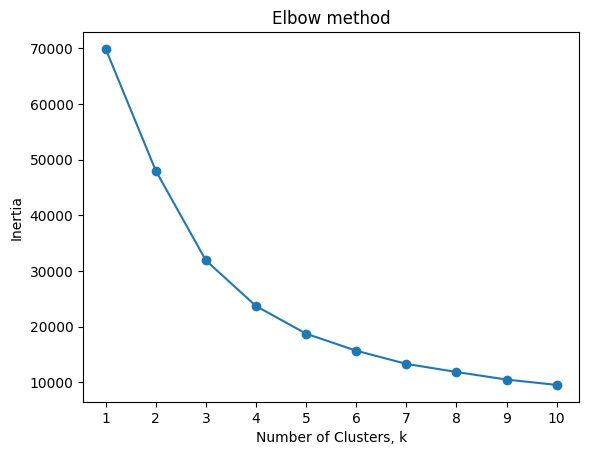

In [46]:
#Perform elbow analysis to determine optimal number of clusters

ks = range(1, 11)
inertias = []

for k in ks:
  #Create KMeans instance with k clusters: model
  model = KMeans(n_clusters=k, random_state=42)
  #Fit the model
  model.fit(pca_scaled_df)

  #Append the inertia to the list of inertias
  inertias.append(model.inertia_)

#plot ks vs inertias
plt.plot(ks, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

**Observation:** From the graph, we will choose n_clusters = 4

# **Step 7: Run the KMeans clustering algorithm**

In [69]:
n_clusters = 4

In [70]:
#Create KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Fit model
kmeans.fit(pca_scaled_df)

#Determine cluster labels
labels = kmeans.predict(pca_scaled_df)

print(labels[:200])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 3 0 1 0 2 0 1 1 0 1 0 0 1 3 1 1 0 0 1 2 0 3 3 0 1 0 3 1 2 0 3 0 0 1 3 0
 3 3 1 0 1 1 0 1 0 1 3 0 1 0 2 1 3 1 1 3 0 1 1 1 0 1 1 3 1 1 1 0 0 0 1 3 0
 1 1 0 2 0 3 3 1 3 2 3 1 1 0 1 1 0 2 1 1 0 3 1 2 0 2 3 0 0 0 1 1 1 2 2 1 3
 2 1 0 3 0 1 3 0 1 2 0 2 0 1 1 3 2 1 1 0 0 3 0 0 2 0 0 1 2 1 1 1 0 1 0 1 0
 2 0 0 1 2 1 1 2 1 3 2 1 0 3 0 0 1 0 1 1 1 0 1 0 0 0 1 3 1 1 0 3 2 1 1 3 3
 1 3 0 1 0 1 0 1 3 2 2 0 1 0 2]


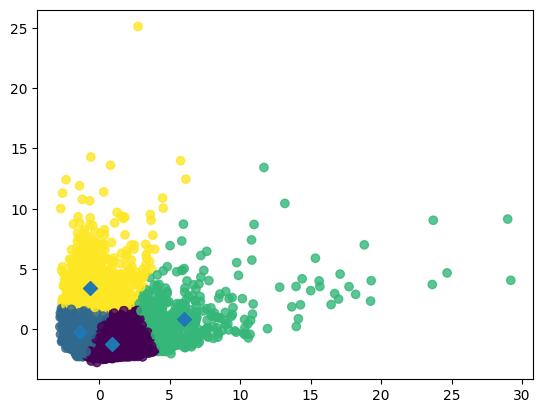

In [71]:
#Plot the clustering

#Assign feature column 0 and 1 as xs and ys
xs = pca_scaled_df[:, 0]
ys = pca_scaled_df[:, 1]

#Make a scatterplot of xs and ys, using labels to define the colours
plt.scatter(xs, ys, c=labels, alpha=0.8)

#Assign centroids
centroids = kmeans.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

#Make a scatterplt of centroids_x, centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

# **Step 8: Final Analysis**

In [72]:
CC_df_clean['LABELS'] = kmeans.labels_
CC_columns = ['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT']
CC_labels = CC_df_clean.groupby('LABELS')[CC_columns].mean()

CC_labels.T.style.background_gradient(cmap='YlOrBr')

LABELS,0,1,2,3
BALANCE,828.995048,1070.532316,3474.272110,4550.462900
PURCHASES,1266.399474,226.651743,7021.550705,461.507978
PURCHASES_INSTALLMENTS_FREQUENCY,0.676401,0.112913,0.809440,0.166241
CASH_ADVANCE_FREQUENCY,0.030836,0.127299,0.086599,0.473986
CREDIT_LIMIT,4283.474549,3101.259259,9639.522822,7510.194321


**Label 0 (Middle-Income):**
- Cluster 0 represents a middle-class customers as they have a credit limit of 4,000, which is the second lowest in the dataset.
- Despite the relatively modest credit limit, these customers exhibit high spending patterns, ranking second highest in terms of purchases.
- Interestingly, they maintain the lowest balances among the clusters, indicating an efficient and timely management of their credit usage.


**Label 1 (Starters):**
- Customers in Cluster 1 exhibit characteristics of being novice credit card users.
- This group has relatively small balances, small purchase amounts, and a modest credit limit. Additionally, the cluster displays very low frequencies in both installment payments and cash advances.
- The overall behavior suggests a cautious spending approach, indicative of individuals who are using a credit card for the first time.

**Label 2 (High-Income Users):**
- Cluster 2 represents customers with very high income as they possess the highest credit limit in the dataset.
- These customers are high spenders and exhibits the highest purchase amounts.
- Their both high income and credit limit makes them the group with significant purchasing power.

**Label 3 (High-Income Users):**
- Cluster 3 is comprised of high-income individuals with the second-highest credit limit.
- Despite having a substantial credit limit, their credit card purchases are relatively small.
- However, a distinctive behavior within this cluster is their substantial cash advances, indicating a propensity for large withdrawals in cash transactions.

I am a Marketing Manager in a bank with the aim to maximize credit card spending and loan utilization within high-value customer segments in Label 2 and Label 3. These clusters stand out due to their elevated income levels and substantial credit card balances.

Since they are made up of valuable customers with high incomes. I want to keep them loyal and prevent them from switching to competitors. Therefore, I will use these strategies which are:

1) **Special Rewards:** Provide special deals and offers aimed at showing appreciation for their loyalty and encouraging them to continue using our services. Give them extra promotions to make sure that they choose to stay with us for their banking needs.

2) **Exclusive Events:** Plan special events and partnerships with fancy brands to make them feel special and want to use their credit cards for luxury experiences.

3) **More Spending Power:** Increase their credit limits to give them more room for big purchases.